In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dementia-patient-health-and-prescriptions-dataset/dementia_patients_health_data.csv


In [2]:
data = pd.read_csv('/kaggle/input/dementia-patient-health-and-prescriptions-dataset/dementia_patients_health_data.csv')
data

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.081825,87,93.851963,36.495134,50.380106,42.318663,Donepezil,10.0,88,...,Never Smoked,Positive,Mild Activity,No,5,No,Balanced Diet,Poor,Diabetes,1
996,1,0.145249,97,94.522391,36.270804,94.006484,52.812568,NaN,NaN,80,...,Never Smoked,Negative,Moderate Activity,No,9,Yes,Low-Carb Diet,Poor,Diabetes,0
997,1,0.073692,65,98.578388,37.065703,80.088613,13.640229,NaN,NaN,67,...,Never Smoked,Positive,Sedentary,No,8,Yes,Balanced Diet,Good,Diabetes,0
998,0,0.037347,71,91.298580,37.037202,95.322210,17.445715,Memantine,20.0,62,...,Never Smoked,Positive,Sedentary,Yes,2,No,Low-Carb Diet,Good,NaN,1


In [3]:
data.shape

(1000, 24)

In [4]:
data.dtypes

Diabetic                       int64
AlcoholLevel                 float64
HeartRate                      int64
BloodOxygenLevel             float64
BodyTemperature              float64
Weight                       float64
MRI_Delay                    float64
Prescription                  object
Dosage in mg                 float64
Age                            int64
Education_Level               object
Dominant_Hand                 object
Gender                        object
Family_History                object
Smoking_Status                object
APOE_ε4                       object
Physical_Activity             object
Depression_Status             object
Cognitive_Test_Scores          int64
Medication_History            object
Nutrition_Diet                object
Sleep_Quality                 object
Chronic_Health_Conditions     object
Dementia                       int64
dtype: object

In [5]:
data.corr

<bound method DataFrame.corr of      Diabetic  AlcoholLevel  HeartRate  BloodOxygenLevel  BodyTemperature  \
0           1      0.084974         98         96.230743        36.224852   
1           0      0.016973         78         93.032122        36.183874   
2           0      0.009000         89         93.566504        37.326321   
3           0      0.086437         60         93.906510        37.030620   
4           1      0.150747         67         97.508994        36.062121   
..        ...           ...        ...               ...              ...   
995         1      0.081825         87         93.851963        36.495134   
996         1      0.145249         97         94.522391        36.270804   
997         1      0.073692         65         98.578388        37.065703   
998         0      0.037347         71         91.298580        37.037202   
999         0      0.085969         90         95.522825        36.026748   

        Weight  MRI_Delay Prescription  Dos

In [6]:
data.describe()

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Dosage in mg,Age,Cognitive_Test_Scores,Dementia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,485.000000,1000.000000,1000.000000,1000.000000
mean,0.513000,0.098429,79.383000,95.226051,36.761513,74.321326,30.103568,9.213402,74.908000,6.383000,0.485000
std,0.500081,0.058715,12.107556,2.929262,0.431701,14.463765,16.862170,6.493188,9.095068,3.180633,0.500025
min,0.000000,0.000414,60.000000,90.010677,36.002108,50.069731,0.094684,1.500000,60.000000,0.000000,0.000000
25%,0.000000,0.045505,68.000000,92.875017,36.395363,61.387339,16.237371,4.000000,67.000000,4.000000,0.000000
50%,1.000000,0.098235,79.000000,95.390420,36.784319,74.149204,29.577194,8.000000,75.000000,8.000000,0.000000
75%,1.000000,0.151840,90.000000,97.785111,37.126655,87.024034,44.176723,12.000000,83.000000,9.000000,1.000000
max,1.000000,0.199866,100.000000,99.999230,37.496809,99.982722,59.957599,23.000000,90.000000,10.000000,1.000000


In [7]:
data.isnull().sum()

Diabetic                       0
AlcoholLevel                   0
HeartRate                      0
BloodOxygenLevel               0
BodyTemperature                0
Weight                         0
MRI_Delay                      0
Prescription                 515
Dosage in mg                 515
Age                            0
Education_Level                0
Dominant_Hand                  0
Gender                         0
Family_History                 0
Smoking_Status                 0
APOE_ε4                        0
Physical_Activity              0
Depression_Status              0
Cognitive_Test_Scores          0
Medication_History             0
Nutrition_Diet                 0
Sleep_Quality                  0
Chronic_Health_Conditions    179
Dementia                       0
dtype: int64

In [8]:
data.fillna(method='ffill', inplace=True)
data.isnull().sum()

/tmp/ipykernel_19/3919082295.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Diabetic                     0
AlcoholLevel                 0
HeartRate                    0
BloodOxygenLevel             0
BodyTemperature              0
Weight                       0
MRI_Delay                    0
Prescription                 1
Dosage in mg                 1
Age                          0
Education_Level              0
Dominant_Hand                0
Gender                       0
Family_History               0
Smoking_Status               0
APOE_ε4                      0
Physical_Activity            0
Depression_Status            0
Cognitive_Test_Scores        0
Medication_History           0
Nutrition_Diet               0
Sleep_Quality                0
Chronic_Health_Conditions    0
Dementia                     0
dtype: int64

In [9]:
data.columns

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
       'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
       'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
       'Dementia'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

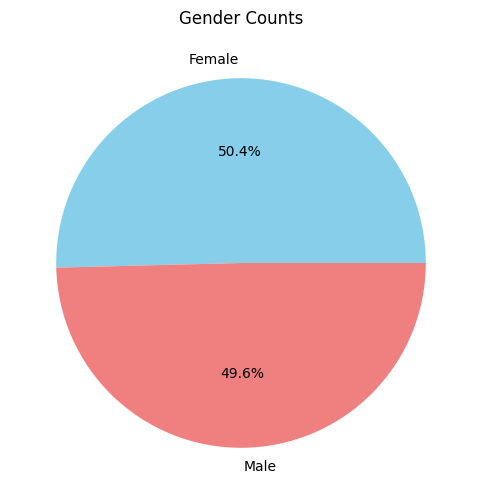

In [11]:
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Counts')
plt.show()

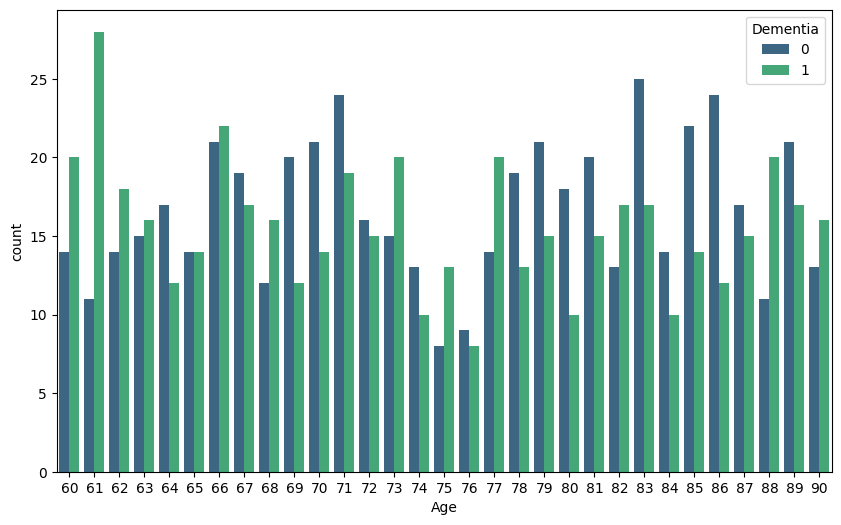

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age', hue='Dementia', palette='viridis')

plt.show()

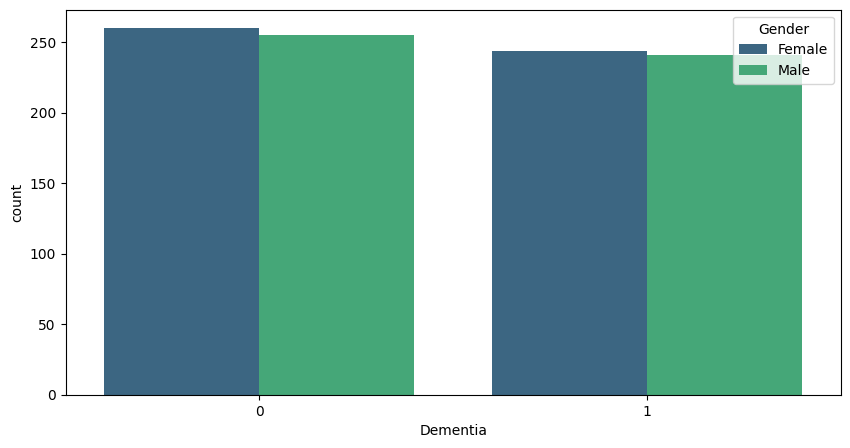

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Dementia', hue='Gender', palette='viridis')

plt.show()

In [14]:
data.columns

Index(['Diabetic', 'AlcoholLevel', 'HeartRate', 'BloodOxygenLevel',
       'BodyTemperature', 'Weight', 'MRI_Delay', 'Prescription',
       'Dosage in mg', 'Age', 'Education_Level', 'Dominant_Hand', 'Gender',
       'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity',
       'Depression_Status', 'Cognitive_Test_Scores', 'Medication_History',
       'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions',
       'Dementia'],
      dtype='object')

In [15]:
data['Depression_Status'].value_counts()

Depression_Status
No     755
Yes    245
Name: count, dtype: int64

In [16]:
data['Physical_Activity'].value_counts()

Physical_Activity
Mild Activity        351
Sedentary            331
Moderate Activity    318
Name: count, dtype: int64

In [17]:
data['Smoking_Status'].value_counts()

Smoking_Status
Former Smoker     458
Never Smoked      452
Current Smoker     90
Name: count, dtype: int64

In [18]:
data['Family_History'].value_counts()

Family_History
Yes    520
No     480
Name: count, dtype: int64

In [19]:
data['Dominant_Hand'].value_counts()

Dominant_Hand
Left     519
Right    481
Name: count, dtype: int64

In [20]:
data['Diabetic'].value_counts()

Diabetic
1    513
0    487
Name: count, dtype: int64

In [21]:
data['Education_Level'].value_counts()

Education_Level
Primary School      389
Secondary School    304
No School           155
Diploma/Degree      152
Name: count, dtype: int64

In [22]:
data['Prescription'].value_counts()

Prescription
Rivastigmine    257
Memantine       254
Donepezil       248
Galantamine     240
Name: count, dtype: int64

In [23]:
data['BodyTemperature'].value_counts()

BodyTemperature
36.224852    1
37.383558    1
37.145689    1
37.018821    1
36.868901    1
            ..
36.346912    1
36.627421    1
36.867302    1
36.064893    1
36.026748    1
Name: count, Length: 1000, dtype: int64

In [24]:
data['BloodOxygenLevel'].value_counts()

BloodOxygenLevel
96.230743    1
95.955448    1
92.512576    1
98.337835    1
91.263593    1
            ..
99.857923    1
91.714044    1
99.258909    1
91.025951    1
95.522825    1
Name: count, Length: 1000, dtype: int64

In [25]:
data['HeartRate'].value_counts()

HeartRate
60     32
71     31
90     31
93     31
99     31
63     30
67     29
74     28
65     28
68     28
66     28
81     28
79     27
62     27
87     26
92     26
64     26
84     25
94     25
61     25
97     24
78     24
69     24
89     24
72     24
82     23
95     23
75     22
98     21
91     21
80     20
73     20
83     20
100    20
86     20
70     19
88     19
77     19
76     18
96     17
85     16
Name: count, dtype: int64

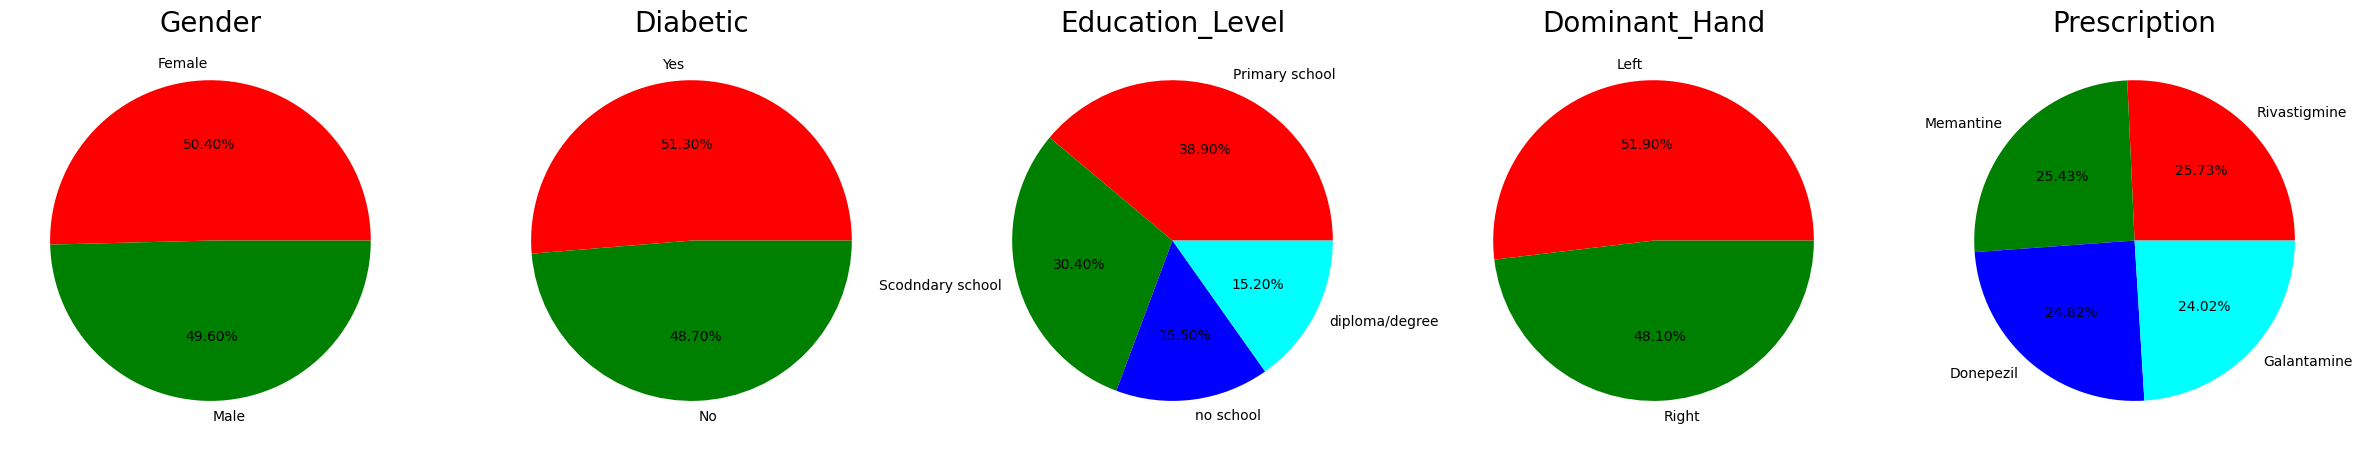

In [26]:
plt.rcParams['figure.figsize'] = (30, 12)

# Create a subplot with five pie charts side by side
plt.subplot(1, 5, 1)
size = data['Gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = data['Diabetic'].value_counts()
labels = 'Yes', 'No'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Diabetic', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = data['Education_Level'].value_counts()
labels = 'Primary school', 'Scodndary school', 'no school', 'diploma/degree'
color = ['red', 'green', 'blue', 'cyan']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Education_Level', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = data['Dominant_Hand'].value_counts()
labels = 'Left', 'Right'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Dominant_Hand', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = data['Prescription'].value_counts()
labels = 'Rivastigmine', 'Memantine', 'Donepezil', 'Galantamine',   
color = ['red', 'green', 'blue', 'cyan']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Prescription', fontsize=20)
plt.axis('off')


plt.grid()
plt.show()

Work in progress...